In [142]:
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.model_selection import train_test_split


## Task1

In [143]:
# Linear Regression class
class GaussianRegression:
    def __init__(self, bases,add_bias=True):
        self.add_bias = add_bias
        self.bases = bases
        self.w = None
    
    def gaussian_transformation(self,x):
        gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)  
        mus = np.linspace(0,20,self.bases)
        X = np.zeros((len(x),self.bases))
        for i, mu in enumerate(mus):
            X[:,i] = gaussian(x,mu,1)
        return X

    def fit(self, x, y):
        X = self.gaussian_transformation(x)
        if y.ndim == 1:
            y = y[:, None]
        N = X.shape[0]
        if self.add_bias:
            X = np.column_stack([X, np.ones(N)])
        #self.w = np.linalg.lstsq(X, y, rcond=None)[0]
        self.w = np.linalg.pinv(X.T@X)@ X.T@y
        return self
    
    def predict(self, x):
        X = self.gaussian_transformation(x)

        if self.add_bias:
            N = X.shape[0]
            X = np.column_stack([X, np.ones(N)])

        return X @ self.w

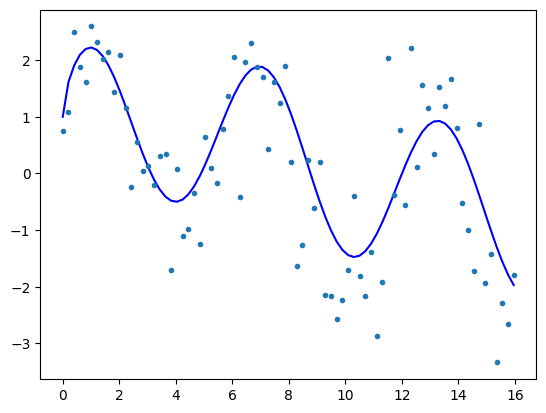

In [144]:
# Generating data

N = 100
X = np.linspace(0,20, N)

y_true = np.sin(np.sqrt(X)) + np.cos(X) + np.sin(X)

y = y_true + np.random.normal(0, 1, 100)

# train_test_split 
X_train, X_test, y_train, y_test,  = train_test_split(X, y, test_size=0.2, shuffle=False)

y_true_train, y_true_test = train_test_split(y_true, test_size=0.2, shuffle=False)

plt.plot(X_train, y_true_train, 'b-', label='correct model')      
plt.plot(X_train, y_train, '.')      

[np.float64(107.22900518413883), np.float64(31.714154331250548), np.float64(17.01502324698487), np.float64(26.32292132104452), np.float64(33.20158095557524), np.float64(37.51006976784608), np.float64(39.55707102551459), np.float64(39.55120237735444), np.float64(39.5422841842238), np.float64(39.53881298167681), np.float64(39.53801281727871)]
[np.float64(74.73499032415734), np.float64(942.7109564587174), np.float64(258928369924.2808), np.float64(16352033940739.367), np.float64(37335945520.05607), np.float64(69152870426.44356), np.float64(1158601633877.4148), np.float64(895093264438.9626), np.float64(834553716019.2534), np.float64(815894854609.8673), np.float64(815207355215.1028)]
The gaussian base with the optimal result is 0


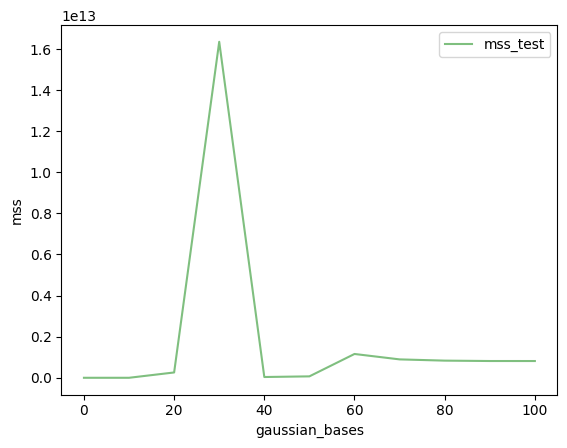

In [147]:
gaussian_bases = [0,10,20,30,40,50,60,70,80,90,100]
model_list = []
mss_train_list = []
mss_test_list = []

y_true_train = y_true_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# create model
for i,bases in enumerate(gaussian_bases):

    model = GaussianRegression(bases)

    y_train_predict = model.fit(X_train,y_train).predict(X_train)
    model_list.append(model)
    mss_train = (y_train_predict - y_true_train)**2
    mss_train_list.append(np.sum(mss_train))

    y_test_predict = model.predict(X_test)

    mss_test = (y_test_predict - y_test)**2

    mss_test_list.append(np.sum(mss_test))
print(mss_train_list)
print(mss_test_list)

min_test_value, min_i = mss_test_list[0], 0
for i in range(11):
    cur = mss_test_list[i]
    if cur < min_test_value:
        min_test_value = cur
        min_i = i

print(f'The gaussian base with the optimal result is {gaussian_bases[min_i]}')

# plot the graph
#plt.plot(gaussian_bases, mss_train_list, 'r-', alpha=.5, label='mss_train')
plt.plot(gaussian_bases, mss_test_list, 'g-', alpha=.5, label='mss_test')
plt.xlabel('gaussian_bases')
plt.ylabel(r'mss')
plt.legend()
plt.show()

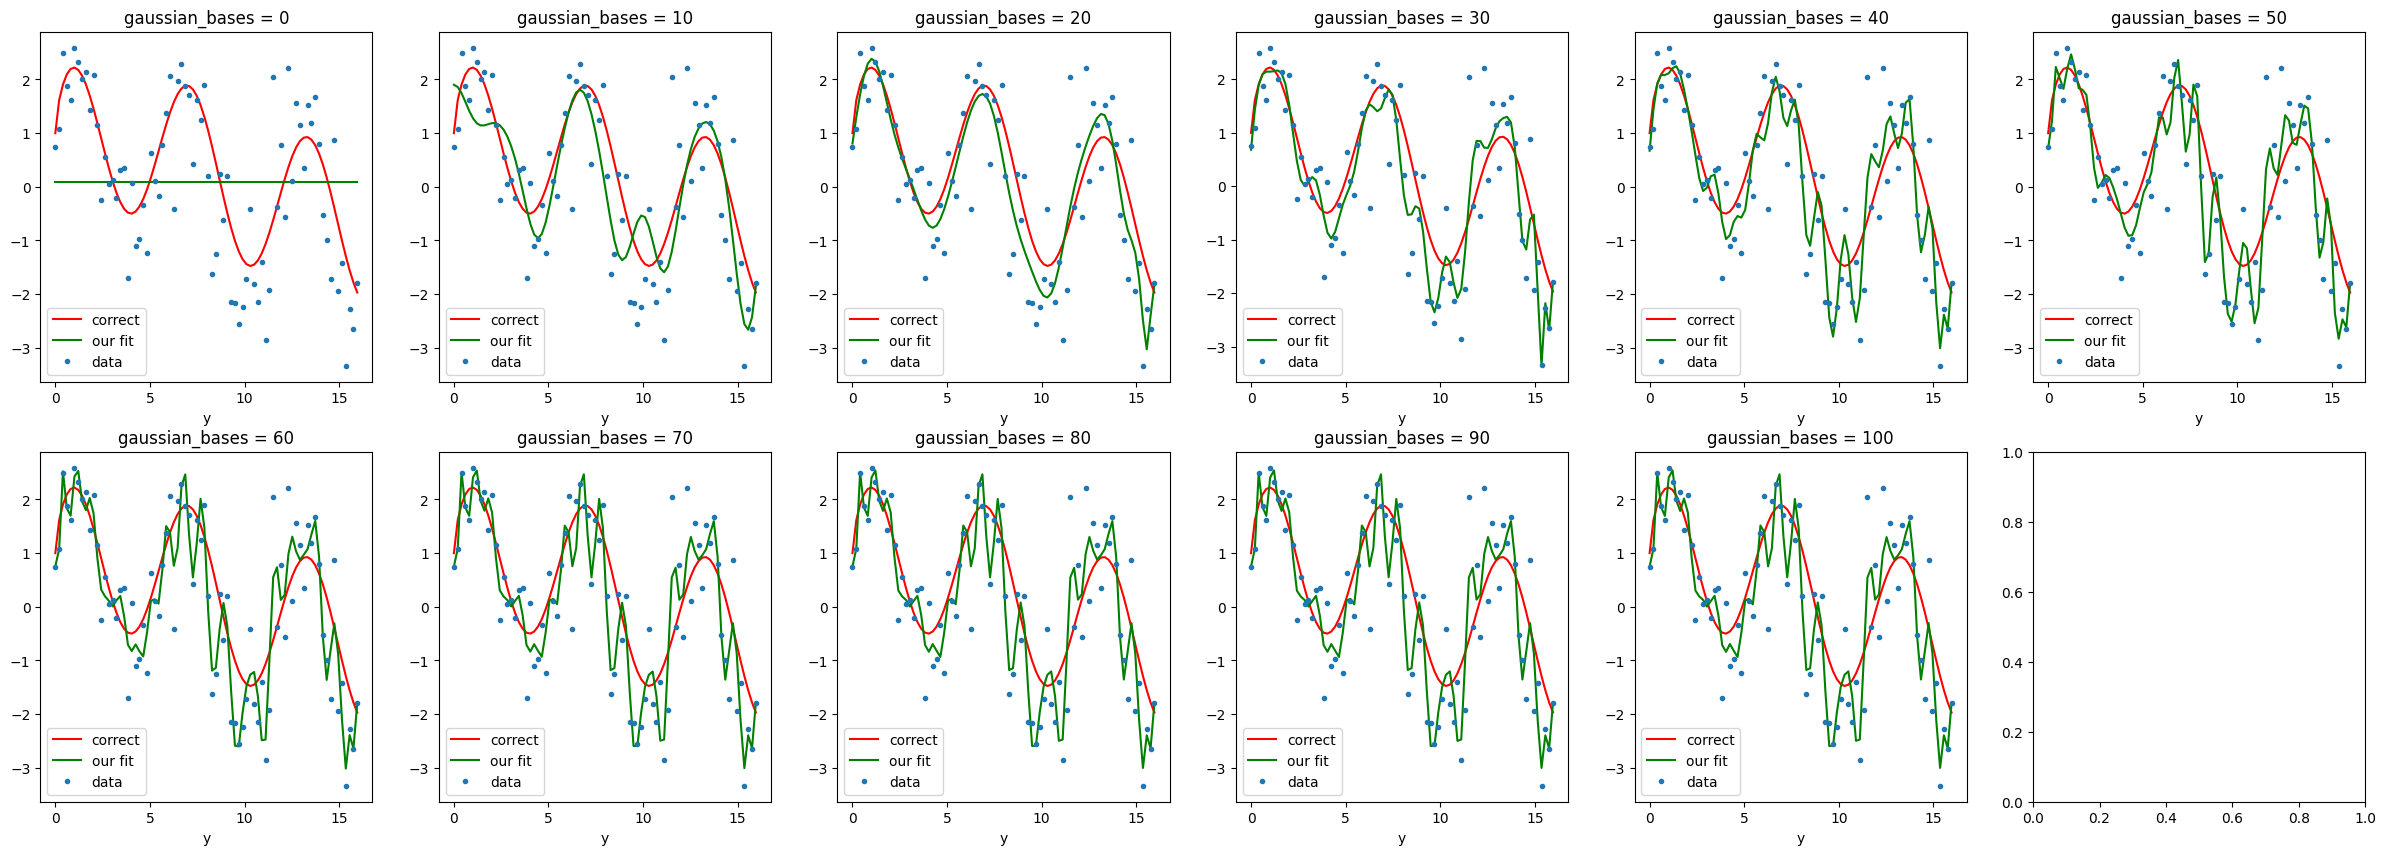

In [149]:
fig, ax = plt.subplots(2,6,figsize=(30,10))



gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)         

ax = ax.flatten()
for i in range(11):
    y_train_predict = model_list[i].fit(X_train,y_train).predict(X_train)
    ax[i].plot(X_train, y_true_train, 'r-', label='correct')      
    ax[i].plot(X_train, y_train_predict, 'g-', label='our fit')
    ax[i].plot(X_train, y_train, '.', label='data')
    ax[i].set_xlabel('x')
    ax[i].set_xlabel('y')
    ax[i].set_title(f'gaussian_bases = {gaussian_bases[i]}')
    ax[i].legend()

# Task2
